In [1]:
import pandas as pd
data= pd.read_csv("Presidential candidate.csv")

讀取檔案

In [3]:
data.head()

,Date,Page_Name,Page_ID,Link,Type,All_Reaction_Count,LIKE_COUNT,WOW_COUNT,LOVE_COUNT,HAHA_COUNT,SAD_COUNT,ANGRY_COUNT,Comment_Count,Share_Count,Message,Link_Title,Link Description,created_time
0,2020/01/11 23:00:48,蔡英文 Tsai Ing-wen,46251501064,NaN,photo,444772,402499,139,40762,1050,119,203,24666,20125,今天晚上，是屬於全體台灣人民的晚上。謝謝台灣人民的勇氣，謝謝台灣人民的堅持。\n \n各位...,NaN,NaN,1578754848000
1,2020/01/11 18:54:47,蔡英文 Tsai Ing-wen,46251501064,NaN,photo,284895,262555,118,20756,1314,33,119,19454,2576,辣台派的大家都來了嗎？\n \n謝謝大家一路與我同行，今晚我們會繼續努力。感謝各位老朋友在...,Photos from 蔡英文 Tsai Ing-wen's post,NaN,1578740087000
2,2019/05/17 15:30:40,蔡英文 Tsai Ing-wen,46251501064,NaN,photo,295136,254552,218,38284,1080,273,729,20462,34686,每個人的愛都是平等的，學習理解和共存，攜手向前\n \n今天，是台灣值得驕傲的一天，因為我...,NaN,NaN,1558078240000
3,2020/01/14 21:06:25,蔡英文 Tsai Ing-wen,46251501064,NaN,photo,260573,246005,596,13690,177,28,77,9482,1754,今天和 陳菊(花媽) 秘書長一起去探望李前總統，他的精神很好。明天是李前總統的生日，我要提前...,NaN,NaN,1579007185000
4,2020/01/10 21:46:53,蔡英文 Tsai Ing-wen,46251501064,NaN,photo,251103,235028,96,15346,332,165,136,10455,10915,今天我們在凱達格蘭大道，這裡是台灣從威權到民主的過程中，最關鍵的地方。鄭南榕的出殯隊伍，曾經...,NaN,NaN,1578664013000


In [5]:
name=data.groupby("Page_Name")

將以page_name為主要排序的資料放入name

In [6]:
n1=name.get_group("蔡英文 Tsai Ing-wen")['LIKE_COUNT'].agg('sum')

取出name資料中"蔡英文"的讚數之"總和"

In [7]:
n2=name.get_group("韓國瑜")['LIKE_COUNT'].agg('sum')

取出name資料中"韓國瑜"的讚數之"總和"

In [8]:
n3=name.get_group("宋楚瑜找朋友")['LIKE_COUNT'].agg('sum')

取出name資料中"宋楚瑜"的讚數之"總和"

In [9]:
data = {'Name':['蔡英文 Tsai Ing-wen', '韓國瑜', '宋楚瑜找朋友'],
        'LIKE':[n1, n2, n3]}

將三人的讚數置入data

In [10]:
likedata = pd.DataFrame(data)

將data以數據框方式存入likedata

In [11]:
likedata

,Name,LIKE
0,蔡英文 Tsai Ing-wen,41036093
1,韓國瑜,22184686
2,宋楚瑜找朋友,475912


印出likedata數據框

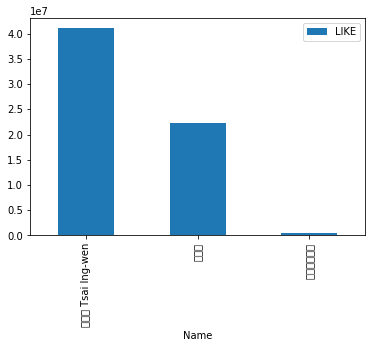

In [16]:
likedata.plot.bar(x='Name', y='LIKE')

長條圖呈現

In [43]:
data['Date'][0]

'2020/01/11 23:00:48'

In [45]:
data['Date'][0].split("/")

['2020', '01', '11 23:00:48']

將data中的['Date'][0].str.split("/")以/符號為分割點

In [25]:
import pandas as pd 
data= pd.read_csv("Presidential candidate.csv")

In [30]:
new = data["Date"].str.split(" ", n = 1, expand = True) 

將data中的Date欄位以空白處一格分割

In [31]:
new

,0,1
0,2020/01/11,23:00:48
1,2020/01/11,18:54:47
2,2019/05/17,15:30:40
3,2020/01/14,21:06:25
4,2020/01/10,21:46:53
...,...,...
1679,2019/04/07,20:29:26
1680,2020/01/01,11:55:23
1681,2019/12/22,09:33:17
1682,2019/04/12,04:01:08


In [32]:
data["Year/Month"]= new[0]

將data欄位建立新的欄位"Year/Month"

In [33]:
data["Hour/Min"]= new[1]

將data欄位建立新的欄位"Hour/Min"

In [34]:
data.drop(columns =["Date"], inplace = True) 

刪除data中的date欄位

In [40]:
data.sort_values(by=['Page_Name','Year/Month'], inplace=True)

將data以page&year為排序

In [48]:
data[['Page_Name', 'LIKE_COUNT','Year/Month']]

,Page_Name,LIKE_COUNT,Year/Month
1670,宋楚瑜找朋友,350,2019/01/01
1621,宋楚瑜找朋友,1111,2019/01/12
1672,宋楚瑜找朋友,341,2019/01/15
1641,宋楚瑜找朋友,871,2019/01/17
1664,宋楚瑜找朋友,419,2019/01/28
...,...,...,...
612,韓國瑜,39895,2020/01/29
757,韓國瑜,35375,2020/01/30
759,韓國瑜,35245,2020/01/30
568,韓國瑜,41329,2020/01/31


In [51]:
data = pd.DataFrame({
   'pig': ['LIKE_COUNT'],
   }, index=[1990, 1997, 2003, 2009, 2014])
lines = data.plot.line()

TypeError: no numeric data to plot

In [18]:
names = ["Year","Month"]

In [19]:
new_df = pd.DataFrame(split2, columns=names)

ValueError: 2 columns passed, passed data had 1 columns

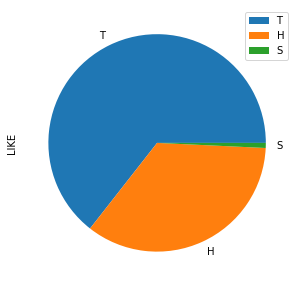

In [64]:
df = pd.DataFrame({'LIKE': [41036093, 22184686, 475912]},
                  index=['T', 'H', 'S'])
plot = df.plot.pie(y='LIKE', figsize=(5, 5))

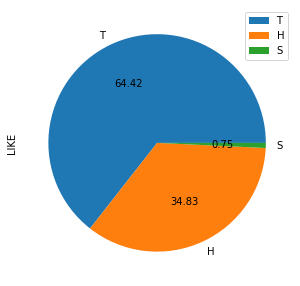

In [40]:
likedata.plot.pie(y='LIKE',labels=['T', 'H', 'S'], autopct='%.2f',figsize=(5, 5))

KeyError: '2020'

In [33]:
import pandas as pd
data= pd.read_csv("Presidential candidate.csv")

In [32]:
data.sort_values(by=['Date'])

,Date,Page_Name,Page_ID,Link,Type,All_Reaction_Count,LIKE_COUNT,WOW_COUNT,LOVE_COUNT,HAHA_COUNT,SAD_COUNT,ANGRY_COUNT,Comment_Count,Share_Count,Message,Link_Title,Link Description,created_time
1082,2019/01/01 00:01:48,韓國瑜,1863023523934803,NaN,photo,25633,24543,15,910,148,3,14,2291,436,【2019新年新希望】\n\n各位好朋友們，2019新年快樂！\n\n不知道各位2018的願...,NaN,NaN,1546272108000
1446,2019/01/01 06:20:45,蔡英文 Tsai Ing-wen,46251501064,NaN,video,11311,10193,16,946,94,10,52,1748,406,我在總統府前參加元旦升旗典禮,NaN,NaN,1546294845000
1399,2019/01/01 08:03:53,蔡英文 Tsai Ing-wen,46251501064,NaN,photo,13770,12911,10,756,64,1,28,514,182,大家早安，新年快樂！\n\n謝謝來自世界各地的「新台灣人」為我們領唱國歌！新的一年，讓我們勇...,Photos from 蔡英文 Tsai Ing-wen's post,NaN,1546301033000
1466,2019/01/01 08:31:36,蔡英文 Tsai Ing-wen,46251501064,NaN,video,10205,8898,9,1121,72,6,99,2482,412,早安，新年快樂！\n新年第一天，我在總統府內舉行新年談話記者會，我要跟國人同胞報告我對新的一...,NaN,NaN,1546302696000
1670,2019/01/01 10:27:34,宋楚瑜找朋友,491399324358361,NaN,photo,361,350,0,10,1,0,0,26,13,早安～新年快樂！北台灣天氣濕冷，鄉親們外出注意頭部的保暖～\n\n期望2019 國泰民安，景...,NaN,NaN,1546309654000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,2020/01/30 22:49:46,韓國瑜,1863023523934803,NaN,photo,36171,35375,14,685,54,9,34,2780,684,【落實防疫工作－左營區行政大樓】\n\n左營區是高鐵、台鐵及高雄捷運三鐵匯聚處，因交通便利成...,Photos from 韓國瑜's post,NaN,1580395786000
870,2020/01/31 12:45:02,韓國瑜,1863023523934803,NaN,photo,32023,31246,12,675,53,4,33,2804,806,【與「礙」同行－無障礙旅遊】\n\n這一年來，高雄觀光旅館住宿旅客較去年成長了10.21%，...,Photos from 韓國瑜's post,NaN,1580445902000
31,2020/01/31 14:02:29,蔡英文 Tsai Ing-wen,46251501064,NaN,photo,136935,134100,52,2377,357,19,30,2641,6797,這陣子，武漢肺炎的防疫是政府最重要的工作，也是大家最關心的議題。\n \n我從臉書和LIN...,NaN,NaN,1580450549000
56,2020/01/31 18:24:32,蔡英文 Tsai Ing-wen,46251501064,NaN,photo,110011,108170,123,1518,80,27,93,7199,10301,❗️假訊息澄清❗️\n \n晚安，我要請各位辣台派幫忙轉傳澄清一則假訊息。政府將口罩統一徵...,NaN,NaN,1580466272000


In [24]:
new = data["Date"].str.split(" ", n = 1, expand = True) 

In [25]:
new

,0,1
0,2020/01/11,23:00:48
1,2020/01/11,18:54:47
2,2019/05/17,15:30:40
3,2020/01/14,21:06:25
4,2020/01/10,21:46:53
...,...,...
1679,2019/04/07,20:29:26
1680,2020/01/01,11:55:23
1681,2019/12/22,09:33:17
1682,2019/04/12,04:01:08


In [28]:
data["year/month"]= new[0]

In [29]:
data["hr/min"]= new[1]

In [30]:
data

,Date,Page_Name,Page_ID,Link,Type,All_Reaction_Count,LIKE_COUNT,WOW_COUNT,LOVE_COUNT,HAHA_COUNT,SAD_COUNT,ANGRY_COUNT,Comment_Count,Share_Count,Message,Link_Title,Link Description,created_time,year/month,hr/min
0,2020/01/11 23:00:48,蔡英文 Tsai Ing-wen,46251501064,NaN,photo,444772,402499,139,40762,1050,119,203,24666,20125,今天晚上，是屬於全體台灣人民的晚上。謝謝台灣人民的勇氣，謝謝台灣人民的堅持。\n \n各位...,NaN,NaN,1578754848000,2020/01/11,23:00:48
1,2020/01/11 18:54:47,蔡英文 Tsai Ing-wen,46251501064,NaN,photo,284895,262555,118,20756,1314,33,119,19454,2576,辣台派的大家都來了嗎？\n \n謝謝大家一路與我同行，今晚我們會繼續努力。感謝各位老朋友在...,Photos from 蔡英文 Tsai Ing-wen's post,NaN,1578740087000,2020/01/11,18:54:47
2,2019/05/17 15:30:40,蔡英文 Tsai Ing-wen,46251501064,NaN,photo,295136,254552,218,38284,1080,273,729,20462,34686,每個人的愛都是平等的，學習理解和共存，攜手向前\n \n今天，是台灣值得驕傲的一天，因為我...,NaN,NaN,1558078240000,2019/05/17,15:30:40
3,2020/01/14 21:06:25,蔡英文 Tsai Ing-wen,46251501064,NaN,photo,260573,246005,596,13690,177,28,77,9482,1754,今天和 陳菊(花媽) 秘書長一起去探望李前總統，他的精神很好。明天是李前總統的生日，我要提前...,NaN,NaN,1579007185000,2020/01/14,21:06:25
4,2020/01/10 21:46:53,蔡英文 Tsai Ing-wen,46251501064,NaN,photo,251103,235028,96,15346,332,165,136,10455,10915,今天我們在凱達格蘭大道，這裡是台灣從威權到民主的過程中，最關鍵的地方。鄭南榕的出殯隊伍，曾經...,NaN,NaN,1578664013000,2020/01/10,21:46:53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679,2019/04/07 20:29:26,宋楚瑜找朋友,491399324358361,NaN,link,203,200,0,3,0,0,0,7,0,收假的夜晚，大家不妨在待會21:40-22:00，收看美國之音節目《海峽論談》，今晚將播出美...,美国之音中文网,美国之音中文官方脸书,1554640166000,2019/04/07,20:29:26
1680,2020/01/01 11:55:23,宋楚瑜找朋友,491399324358361,NaN,photo,85,75,0,10,0,0,0,21,1,NaN,宋楚瑜找朋友's cover photo,NaN,1577850923000,2020/01/01,11:55:23
1681,2019/12/22 09:33:17,蔡英文 Tsai Ing-wen,46251501064,NaN,video,60,59,0,1,0,0,0,0,0,選戰倒數20天，現在 陳建仁 Chen Chien-Jen副總統以及 賴清德副總統候選人，將...,2020 小英發言人,選戰倒數20天，現在陳建仁副總統以及賴清德副總統候選人，將領軍陪同我們雙北的立委候選人進行車...,1576978397000,2019/12/22,09:33:17
1682,2019/04/12 04:01:08,韓國瑜,1863023523934803,NaN,video,55,52,0,2,0,1,0,2,1,想當年在政大東亞所讀書的時候，哈佛大學費正清研究中心之於我，就像南極大陸之於一名極限探險家一...,NaN,NaN,1555012868000,2019/04/12,04:01:08


In [27]:
new.sort_values(by=['1'])

KeyError: '1'